# Project 3. Design of fed-batch bioreactors

## Exercise 3

In some fermentations, the growth and product-formation steps to be separated, e.g., secondary metabolite, culture of genetically engineered cells.

Consider a system consisting of two reactors in serial. If the flowrate (F) is 100 L.h $^{-1}$, input substrate concentration is 10 g.L $^{-1}$ ($S_0$), max yield is 0.5, and Monod growth parameters are: $\mu_{max}$ = 1 h $^{-1}$ and $K_S$ = 0.75 g.L $^{-1}$, predict the outlet concentrations of the cell and substrate plus specific growth rate under following assumptions:

System is operating under steady state conditions.\
You can neglect the maintenance energy of the cells. 

In [1]:
F = 100 #L/h
S0 = 10 #g/L
Y_XS = 0.5
mumax = 1 #/h
Ks = 0.75 #g/L

For the first reactor, the feed is sterile, thus the equation found in project 2, exercise 4 hold:

* $\mu = D_1$

* $S_1 = D_1 \cdot \frac{K_s}{D_{max} - D_1}$

* $X_1 = Y_{X/S} \cdot (S_0 - S_1)$

For the second reactor, these equations don't hold anymore since the feed contain some cell at the concentration $X_1$. Starting form the mass balance for the cells in reactor 2:

* $0 = D_2 \cdot X_1 - D_2 \cdot X_2 + {r_X}_2$

Knowing that ${r_X}_2 = \mu_2 \cdot X_2$ and that $\mu_2 = \frac{\mu_{max} \cdot S_2}{K_S + S_2}$, the mass balance can be written:

* $0 = D_2 \cdot X_1 - D_2 \cdot X_2 + \frac{\mu_{max} \cdot S_2}{K_S + S_2} \cdot X_2$

Isolating $X_2$ gives:

* $X_2 = \frac{D_2 \cdot X_1 \cdot (K_S + S_2)}{D_2 \cdot (K_S + S_2) - S_2 \cdot \mu_{max}}$

Starting from the mass balance for the substrate in reactor 2:

* $0 = D_2 \cdot S_1 - D_2 \cdot S_2 + {r_S}_2$

Knowing that ${r_S}_2 = -\frac{{r_X}_2}{Y_{X/S}}$, this can be written as:

* $0 = D_2 \cdot S_1 - D_2 \cdot S_2 - \frac{\mu_{max} \cdot S_2}{Y_{X/S} \cdot (K_S + S_2)} \cdot X_2$

After substituing for $X_2$:

* $0 = D_2 \cdot S_1 - D_2 \cdot S_2 - \frac{\mu_{max} \cdot S_2 \cdot D_2 \cdot X_1}{Y_{X/S} \cdot (D_2 \cdot (K_S + S_2) - S_2 \cdot \mu_{max})}$

Which gives a second order equation when solving for $S_2$, where the coefficients are:

* $a = Y_{X/S} \cdot (\mu_{max} - D_2)$

* $b = Y_{X/S} \cdot (S_1 \cdot D_2 - \mu_{max} \cdot S_1 - K_S \cdot D_2) - \mu_{max} \cdot X_1$

* $c = Y_{X/S} \cdot K_S \cdot S_1 \cdot D_2$

Or:

$S_2 = -\frac{-\sqrt{(D_2 \cdot Y_{X/S} \cdot (K_S - S_1) + \mu_{max} \cdot (S_1 \cdot Y_{X/S} + X1))^2 + 4 \cdot D_2 \cdot K_S \cdot S_1 \cdot Y_{X/S}^2 \cdot (D_2 - \mu_{max})} + D_2 \cdot K_S \cdot Y_{X/S} - D_2 \cdot S_1 \cdot Y_{X/S} + \mu_{max} \cdot S_1 \cdot Y_{X/S} + \mu_{max} \cdot X_1}{2 \cdot Y_{X/S} \cdot (D_2 - \mu_{max})}$

In [2]:
import numpy as np

def predict(V1, V2, display = True):
    D1 = F/V1
    mu1 = D1
    if mumax - D1 <= 0:
        mu1 = mumax
        S1 = S0
    else:
        S1 = D1*Ks/(mumax - D1)
    if S1 > S0:
        S1 = S0
    
    X1 = Y_XS*(S0 - S1)

    if V2 != 0:
        if X1 > 0:
            D2 = F/V2
            if D2 == mumax:
                D2 = D2 + 1e-9
            S2 = -(-np.sqrt((D2*Y_XS*(Ks - S1) + mumax*(S1*Y_XS + X1))**2 + 4*D2*Ks*S1*Y_XS**2*(D2 - mumax)) + D2*Ks*Y_XS - D2*S1*Y_XS + S1*mumax*Y_XS + mumax*X1)/(2*Y_XS*(D2 - mumax))
            if S2 > S1:
                S2 = S1
            mu2 = mumax*S2/(Ks + S2)
            if mu2 > mumax:
                mu2 = mumax
            X2 = D2*X1*(Ks + S2)/(D2*(Ks + S2) - S2*mumax)
        else:
            D2 = F/V2
            mu2 = D2
            if mumax - D2 <= 0:
                mu2 = mumax
                S2 = S1
            else:
                S2 = D2*Ks/(mumax - D2)
            if S2 > S0:
                S2 = S1
            
            X2 = Y_XS*(S1 - S2)

    if display:
        print(f"Specific growth rate in reactor 1: {round(mu1, 3)}")
        print(f"Concentration of substrate in reactor 1: {round(S1, 3)}")
        print(f"Concentration of biomass in reactor 1: {round(X1, 3)}")

    if V2 != 0:
        if display:
            print(f"Specific growth rate in reactor 2: {round(mu2, 3)}")
            print(f"Concentration of substrate in reactor 2: {round(S2, 3)}")
            print(f"Concentration of biomass in reactor 2: {round(X2, 3)}")
    else:
        mu2 = None
        S2 = None
        X2 = None

    return np.array([mu1, S1, X1, mu2, S2, X2])

### Question a)
**The working volume of the first reactor is 800 L and the second 200 L.**

In [3]:
qa = predict(800, 200)

Specific growth rate in reactor 1: 0.125
Concentration of substrate in reactor 1: 0.107
Concentration of biomass in reactor 1: 4.946
Specific growth rate in reactor 2: 0.005
Concentration of substrate in reactor 2: 0.004
Concentration of biomass in reactor 2: 4.998


### Question b)
**The working volume of the first reactor is 200 L and the second 800 L.**

In [4]:
qb = predict(200, 800)

Specific growth rate in reactor 1: 0.5
Concentration of substrate in reactor 1: 0.75
Concentration of biomass in reactor 1: 4.625
Specific growth rate in reactor 2: 0.009
Concentration of substrate in reactor 2: 0.007
Concentration of biomass in reactor 2: 4.996


### Question c)
**The working volume of the first reactor is 900 L and the second 100 L.**

In [5]:
qc = predict(900, 100)

Specific growth rate in reactor 1: 0.111
Concentration of substrate in reactor 1: 0.094
Concentration of biomass in reactor 1: 4.953
Specific growth rate in reactor 2: 0.009
Concentration of substrate in reactor 2: 0.007
Concentration of biomass in reactor 2: 4.997


### Question d)
**The working volume of the first reactor is 100 L and the second 900 L.**

In [6]:
qd = predict(100, 900)

Specific growth rate in reactor 1: 1
Concentration of substrate in reactor 1: 10
Concentration of biomass in reactor 1: 0.0
Specific growth rate in reactor 2: 0.111
Concentration of substrate in reactor 2: 0.094
Concentration of biomass in reactor 2: 4.953


### Question e)
**Compare the proposed configurations in terms of output cell and substrate concentrations.**\
**Compare the value predicted if a single 1000 L reactor was used.**

Specific growth rate in reactor 1: 0.1
Concentration of substrate in reactor 1: 0.083
Concentration of biomass in reactor 1: 4.958


C:\Users\jrjon\AppData\Local\Temp\ipykernel_12144\2058815994.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  D1 = F/V1


5.0
[0.1        0.08333333 4.95833333        nan        nan        nan]


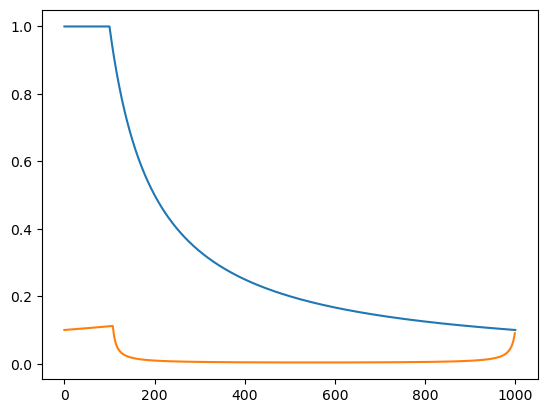

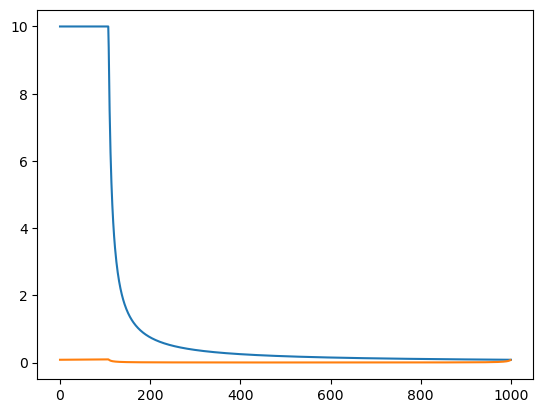

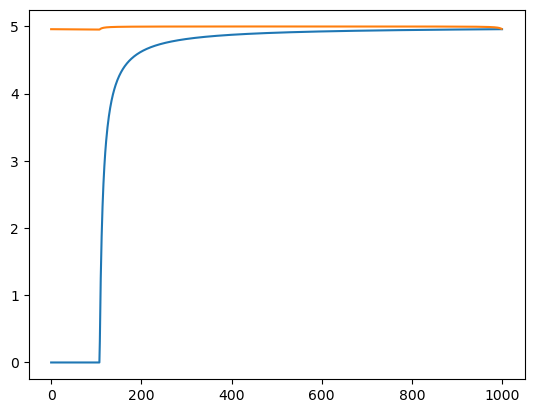

C:\Users\jrjon\AppData\Local\Temp\ipykernel_12144\1615865002.py:25: RuntimeWarning: divide by zero encountered in divide
  plt.plot(V1, np.round(-100/V1*results[:, 2] + results[:, 0]*results[:, 2], 3))
C:\Users\jrjon\AppData\Local\Temp\ipykernel_12144\1615865002.py:25: RuntimeWarning: invalid value encountered in multiply
  plt.plot(V1, np.round(-100/V1*results[:, 2] + results[:, 0]*results[:, 2], 3))


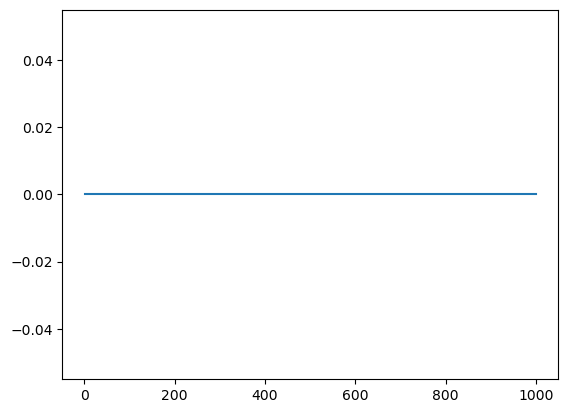

C:\Users\jrjon\AppData\Local\Temp\ipykernel_12144\1615865002.py:27: RuntimeWarning: divide by zero encountered in divide
  plt.plot(V1, np.round(100/V1*S0 - 100/V1*results[:, 1] - results[:, 0]*results[:, 2]/Y_XS, 3))
C:\Users\jrjon\AppData\Local\Temp\ipykernel_12144\1615865002.py:27: RuntimeWarning: invalid value encountered in subtract
  plt.plot(V1, np.round(100/V1*S0 - 100/V1*results[:, 1] - results[:, 0]*results[:, 2]/Y_XS, 3))


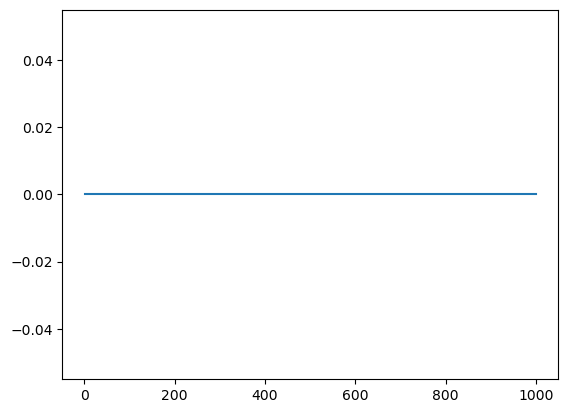

C:\Users\jrjon\AppData\Local\Temp\ipykernel_12144\1615865002.py:29: RuntimeWarning: divide by zero encountered in divide
  plt.plot(V1, np.round(100/V2*results[:, 2] - 100/V2*results[:, 5] + results[:, 3]*results[:, 5], 3))


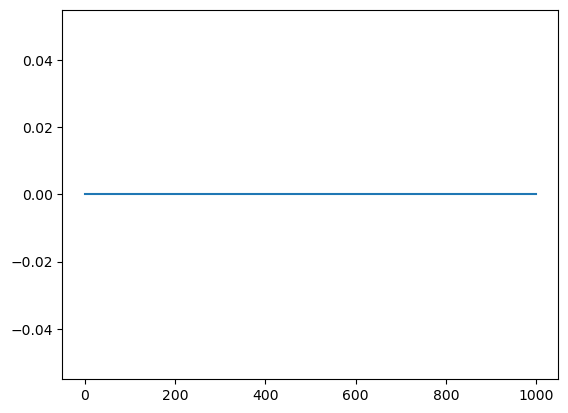

C:\Users\jrjon\AppData\Local\Temp\ipykernel_12144\1615865002.py:31: RuntimeWarning: divide by zero encountered in divide
  plt.plot(V1, np.round(100/V2*results[:, 1] - 100/V2*results[:, 4] - results[:, 3]*results[:, 5]/Y_XS, 3))


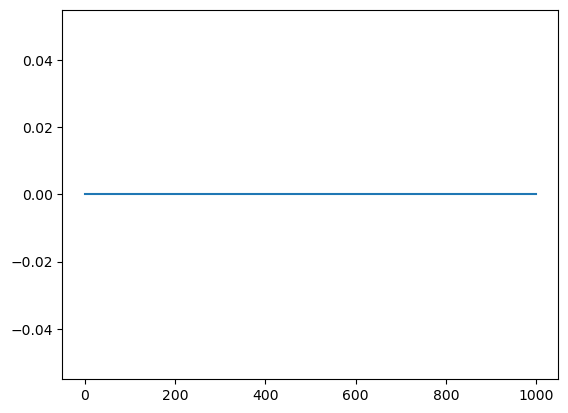

In [7]:
qe = predict(1000, 0)

V1 = np.linspace(0, 1000, 1001)
V2 = 1000 - V1
results = np.zeros((len(V1), 6))

for i in range(len(V1)):
    results[:][i] = predict(V1[i], V2[i], display = False)

import matplotlib.pyplot as plt

plt.plot(V1, results[:, 0], label = "mu1")
plt.plot(V1, results[:, 3], label = "mu2")
plt.show()
plt.plot(V1, results[:, 1], label = "S1")
plt.plot(V1, results[:, 4], label = "S2")
plt.show()
plt.plot(V1, results[:, 2], label = "X1")
plt.plot(V1, results[:, 5], label = "X2")
plt.show()

plt.plot(V1, np.round(-100/V1*results[:, 2] + results[:, 0]*results[:, 2], 3))
plt.show()
plt.plot(V1, np.round(100/V1*S0 - 100/V1*results[:, 1] - results[:, 0]*results[:, 2]/Y_XS, 3))
plt.show()
plt.plot(V1, np.round(100/V2*results[:, 2] - 100/V2*results[:, 5] + results[:, 3]*results[:, 5], 3))
plt.show()
plt.plot(V1, np.round(100/V2*results[:, 1] - 100/V2*results[:, 4] - results[:, 3]*results[:, 5]/Y_XS, 3))